# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-bp68k3n1
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-bp68k3n1
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev17+g0caf0962-py3-none-any.whl size=1260150 sha256=68e9ff4c970ea16fa277cfc05d181b4cd9586b9991aa15365a0aad190a6ab054
  Stored in directory: /tmp/pip-ephem-wheel-cache-eh3du4bc/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.0 MB/s eta 0:00:00
   ━

In [9]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Including polynomial elements can be helpful to model a non-linear relationship without having to use a more complex model. It can also be helpful to predict things better by modeling interactions.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

When using polynomial elements in your model, overfitting and instability are concerns. These problems usually occur when using higher-degree polynomials in your model. Using a higher-degree polynomial can result in overfitting because they can capture noise rather than real patterns. Using higher-degree polynomials can also result in instability because the polynomials can be unpredictable in their oscillations.

**Task3**:

What's the point of using b splines?

B splines can model smooth, non-linear relationships without using a higher-degree polynomial which might result in instability in your model. B splines use piecewise polynomials to acheive this and can avoid overfitting becuase of their piecewise nature.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process that uses an infinite number of functions to calculate a whole range of outputs based on given inputs. It predicts a distribution of possible outputs and then gives a mean output which is what is most likely to happen and a variance which is our uncertainty.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [3]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

In [4]:
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [6]:
model_poly_3 = bmb.Model("weight ~ poly(height, degree=3)", howell, family="negativebinomial")
idata_poly_3 = model_poly_3.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


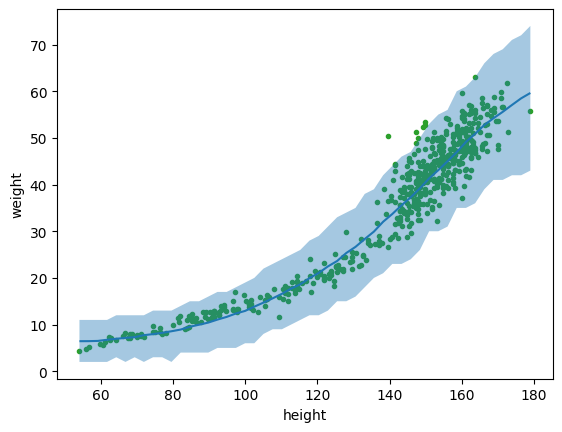

In [7]:
bmb.interpret.plot_predictions(model_poly_3, idata_poly_3, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

<Axes: xlabel='weight'>

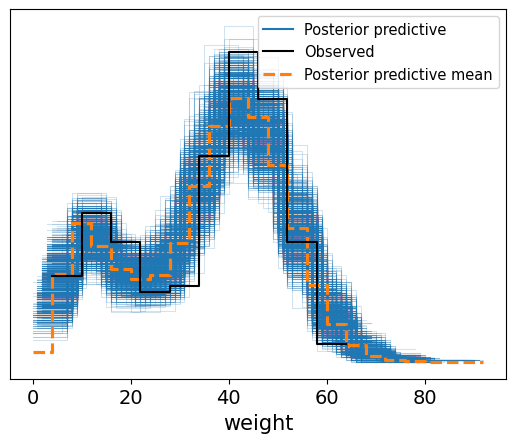

In [22]:
az.plot_ppc(idata_poly_3, data_pairs={"y": "weight"})

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that covariance functions or kernel functions, which are functions that describe the relationship between pairs of datapoints, can be combined by either adding them together, multiplying them together, or by scaling a base covariance function.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

I found a graph that predicts the amount of CO2 in Earth's atmosphere for the next 20 years based on data from the last 20 years. I think it's interesting because you can see that not only does the amount of CO2 in the atmosphere change throughout the year, but it is increasing year over year. Another interesting thing is how as we get further and further into the future the predictions get less accurate which can be seen by the different lines which are seperate predictions getting wider and wider apart.